In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize
import cv2
import os
from cnn import SimpleCNN

In [3]:
ORIGINAL_SIZE = 424
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
data_dir = 'galaxy-zoo-the-galaxy-challenge/images_training_rev1'

In [6]:
for root, dir, fname in os.walk(data_dir):
    print(os.path.join(data_dir, fname[0]))

galaxy-zoo-the-galaxy-challenge/images_training_rev1/873932.jpg


<class 'numpy.ndarray'> (424, 424, 3)


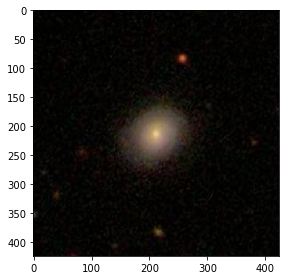

In [7]:
# load sample image
from skimage import io, color
img = io.imread('galaxy-zoo-the-galaxy-challenge/images_training_rev1/100008.jpg')

print(type(img), img.shape)
io.imshow(img)
io.show()

## Load Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
labels_df = pd.read_csv('galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.csv')

In [10]:
labels_df.set_index('GalaxyID', inplace=True)

In [11]:
labels_df

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,
100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296


In [12]:
# number of classes
labels_df.shape[1]

37

In [13]:
labels_df.index.array.astype(int)

array([100008, 100023, 100053, ..., 999958, 999964, 999967])

In [14]:
labels_df.values[:,:]

array([[0.383147  , 0.616853  , 0.        , ..., 0.        , 0.        ,
        0.32551225],
       [0.327001  , 0.663777  , 0.009222  , ..., 0.        , 0.        ,
        0.        ],
       [0.765717  , 0.177352  , 0.056931  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.202841  , 0.777376  , 0.019783  , ..., 0.        , 0.        ,
        0.07229626],
       [0.091     , 0.909     , 0.        , ..., 0.02306456, 0.        ,
        0.04533378],
       [0.767     , 0.14      , 0.093     , ..., 0.        , 0.        ,
        0.02338   ]])